<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-функций" data-toc-modified-id="Анализ-функций-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ функций</a></span></li><li><span><a href="#Метод-Ньютона" data-toc-modified-id="Метод-Ньютона-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метод Ньютона</a></span></li><li><span><a href="#Метод-простых-итераций" data-toc-modified-id="Метод-простых-итераций-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Метод простых итераций</a></span></li></ul></div>

# Анализ функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f1(x):
    return (x[0] ** 2 + 4) * x[1] - 8

def f2(x):
    return (x[0] - 1) ** 2 + (x[1] - 1) ** 2 - 4

def df1_1(x):
    return 2 * x[0] * x[1]

def df1_2(x):
    return x[0] ** 2 + 4

def df2_1(x):
    return 2 *(x[0] - 1)

def df2_2(x):
    return 2 *(x[1] - 1)

a = -1.5
b = 3.5

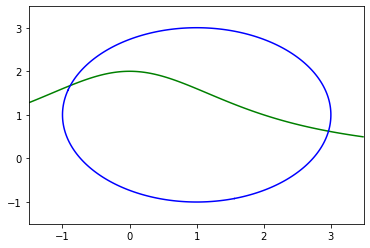

In [3]:
x = np.arange(a,b,0.01)
y = np.arange(a,b,0.01)
x, y = np.meshgrid(x,y)
z1 = (x ** 2 + 4) * y - 8
z2 = (x - 1) ** 2 + (y - 1) ** 2 - 4
plt.contour(x,y,z1,levels =0,colors = 'green' )
plt.contour(x,y,z2,levels =0, colors = 'blue')

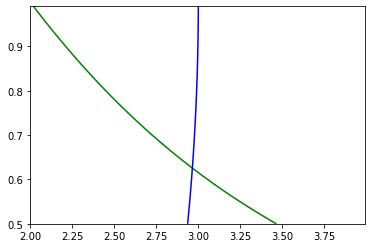

In [4]:
x = np.arange(2,4,0.01)
y = np.arange(0.5,1,0.01)
x, y = np.meshgrid(x,y)
z1 = (x ** 2 + 4) * y - 8
z2 = (x - 1) ** 2 + (y - 1) ** 2 - 4
plt.contour(x,y,z1,levels =0,colors = 'green' )
plt.contour(x,y,z2,levels =0, colors = 'blue')

положительное решение находится в 2.75 < x1 < 3, 0.5 < x2 < 0.7

# Метод Ньютона

In [5]:
def A1(x):
    a = np.zeros((2,2), dtype=int)
    a[0, 0] = f1(x)
    a[1, 0] = f2(x)
    a[0, 1] = df1_2(x)
    a[1, 1] = df2_2(x)
    return np.linalg.det(a)

def A2(x):
    a = np.zeros((2,2),dtype=int)
    a[0, 0] = df1_1(x)
    a[1, 0] = df2_1(x)
    a[0, 1] = f1(x)
    a[1, 1] = f2(x)
    return np.linalg.det(a)

def J(x):
    a = np.zeros((2,2),dtype=int)
    a[0, 0] = df1_1(x)
    a[1, 0] = df2_1(x)
    a[0, 1] = df1_2(x)
    a[1, 1] = df2_2(x)
    return np.linalg.det(a)

In [6]:
def newton_next(x):
    y = [0, 0]
    y[0] = x[0] - A1(x) / J(x)
    y[1] = x[1] - A2(x) / J(x)
    return y


def newton(a, b, eps):
    count = 0
    x = [a, b]
    x_next = newton_next(x)
    while max(abs(x[0] - x_next[0]), abs(x[1] - x_next[1])) > eps:
        x = x_next
        x_next = newton_next(x)
        count += 1
    return x_next, count

In [7]:
a1 = 2
b1 = 0
newton(a1, b1, 0.001)

([2.9499999999999993, 0.6265037593984962], 4)

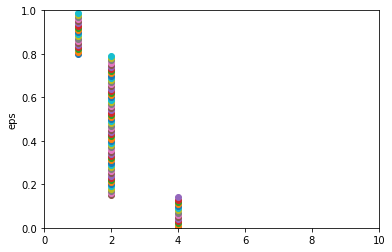

In [8]:
# зависимость от кл-ва итераций
point = {i : [newton(a1, b1, i * 0.01)[1], i * 0.01] for i in range(100) }
for i in point:
    plt.scatter(*point[i] )
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.ylabel('eps')
plt.show()

# Метод простых итераций

In [9]:
def phi1(x):
    return 8 / (x[1] ** 2 + 4)
    
def phi2(x):
    return (4 - (x[0] - 1) ** 2) ** 0.5 + 1

def dphi1_1(x):
    return -16 * x[1] / (x[1] ** 2 + 4) ** 2

def dphi1_2(x):
    return 0

def dphi2_1(x):
    return 0

def dphi2_2(x):
    return (x[0] + 1) / (-(x[0]**2) + 2*x[0] +3) ** 0.5

def find_q(x):
    maxphi1 = dphi1_1(x) + dphi1_2(x)
    maxphi2 = dphi2_1(x) + dphi2_2(x)
    return max(maxphi1, maxphi2)


In [16]:
a1 = 0.5
b1 = 0.2
x = [a1, b1]
find_q(x)


0.7745966692414834

In [19]:
def iteration_next(x):
    y = [0, 0]
    y[0] = phi1(x)
    y[1] = phi2(x)
    return y

def simple_iter(a, b, eps):
    count = 0
    x = [a, b]
    q = find_q(x)
    x_next = iteration_next(x)
    while max([abs(i - j) for i, j in zip(x_next, x)]) * q / (1 - q) > eps:
        x = x_next
        x_next = iteration_next(x)
        count += 1
    return x_next, count


In [20]:
a1 = 0.5
b1 = 0.2
simple_iter(a1, b1, 0.001)

([0.625534279228269, 2.96466758285609], 7)

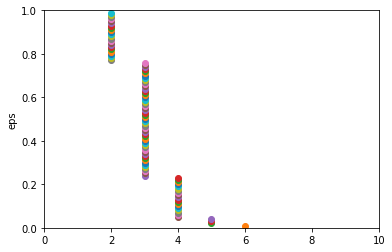

In [21]:
# зависимость от кл-ва итераций
point = {i : [simple_iter(a1, b1, i * 0.01)[1], i * 0.01] for i in range(100) }
for i in point:
    plt.scatter(*point[i] )
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.ylabel('eps')
plt.show()